# Cancer Cervical

https://www.kaggle.com/loveall/cervical-cancer-risk-classification

# Bibliotecas

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PowerTransformer, Normalizer, Binarizer, QuantileTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from skopt import gp_minimize, dummy_minimize
from skopt.plots import plot_convergence
from matplotlib.pyplot import figure
from PIL import Image
from IPython.display import display, Image
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from matplotlib.pyplot import figure
from sklearn import metrics
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento e Tratamento dos Dados

In [2]:
warnings.filterwarnings("ignore")

dados = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
dados.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [3]:
novos_dados = dados.copy()
del novos_dados["STDs: Time since first diagnosis"]
del novos_dados["STDs: Time since last diagnosis"]

for col in list(novos_dados.columns):
    novos_dados = novos_dados[novos_dados[col] != "?"]

novos_dados = novos_dados.reset_index(drop = True)
novos_dados

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
664,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
665,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
666,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
novos_dados = novos_dados.drop_duplicates(keep = "first")
novos_dados

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
664,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
665,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
666,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# Divisão e Balanceamento dos Dados

In [5]:
nomes = list(novos_dados.columns)
Nomes = nomes.copy()
Nomes.remove("Biopsy")

X = novos_dados[Nomes].values
Y = novos_dados.Biopsy

X_A, X_val_A, Y, Y_val_A = train_test_split(X, Y, test_size = 0.1, random_state = 7)

under_random = RandomUnderSampler(random_state = 7)
X_A, Y = under_random.fit_resample(X_A, Y)

escala_minmax = MinMaxScaler().fit(X_A)
X_B = escala_minmax.transform(X_A)

escala_padronizada = StandardScaler().fit(X_A)
X_C = escala_padronizada.transform(X_A)

escala_robust = RobustScaler().fit(X_A)
X_D = escala_robust.transform(X_A)

escala_maxabs = MaxAbsScaler().fit(X_A)
X_E = escala_maxabs.transform(X_A)

escala_normalizer = Normalizer().fit(X_A)
X_F = escala_normalizer.transform(X_A)

escala_quantile = QuantileTransformer(random_state = 7).fit(X_A)
X_G = escala_quantile.transform(X_A)

Y = Y.values

# Cross-Validation

In [6]:
def cross_val(score_k, cv):
    escala = {"Original": [None, X_A],
              "MinMaxScaler": [preprocessing.MinMaxScaler(feature_range = (0, 1)), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(), X_G]}
    
    metricas = {"acc": "accuracy",
                "rec": "recall",
                "prec": "precision"}
    
    modelo = MLPClassifier(random_state = 7)
    
    C = len(Nomes)
    c = 0
    resultados = []
    for esc in escala:
        for K in [C, C - 1, C - 2, C - 3, C - 4, C - 5, C - 6, C - 7, C - 8, C - 9, C - 10,
                  C - 11, C - 12, C - 13, C - 14, C - 15, C - 16, C - 17, C - 18, C - 19, C - 20,
                  C - 21, C - 22, C - 23, C - 24, C - 25, C - 26, C - 27]:
                
            kbest = SelectKBest(score_k, k = K).fit(escala[esc][1], Y)
            colunas = kbest.get_support(indices = True)
            cross = cross_validate(make_pipeline(escala[esc][0], modelo), X_A[:,colunas], Y, cv = cv.n_splits, scoring = metricas)

            resultados.append((str(modelo), esc, K, (sum(cross["test_acc"]) / cv.n_splits),
                               (sum(cross["test_rec"]) / cv.n_splits), (sum(cross["test_prec"]) / cv.n_splits)))
            if c % 29 == 0:
                print(resultados[c])
            c +=1

    return pd.DataFrame(resultados, columns = ["Modelos", "Escala dos Dados", "Variáveis Utilizadas",
                                               "Acurácia Média", "Recall Médio", "Precisão Média"]).sort_values("Acurácia Média", ascending = False)

#results = cross_val(f_classif, StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7))
#results.to_csv("cervical_cross.csv", index = False)
results = pd.read_csv("cervical_cross.csv")
results.head(56)

,Modelos,Escala dos Dados,Variáveis Utilizadas,Acurácia Média,Recall Médio,Precisão Média
0,MLPClassifier(random_state=7),Normalizer,7,0.9250,0.900,0.950000
1,MLPClassifier(random_state=7),StandardScaler,7,0.9250,0.900,0.950000
2,MLPClassifier(random_state=7),StandardScaler,13,0.9250,0.900,0.946429
3,MLPClassifier(random_state=7),MaxAbsScaler,11,0.9125,0.875,0.946429
4,MLPClassifier(random_state=7),MaxAbsScaler,6,0.9125,0.875,0.946429
5,MLPClassifier(random_state=7),MinMaxScaler,13,0.9125,0.875,0.946429
6,MLPClassifier(random_state=7),MinMaxScaler,12,0.9125,0.875,0.946429
7,MLPClassifier(random_state=7),MinMaxScaler,11,0.9125,0.875,0.946429
8,MLPClassifier(random_state=7),MinMaxScaler,8,0.9125,0.875,0.946429
9,MLPClassifier(random_state=7),MinMaxScaler,7,0.9125,0.875,0.946429


In [7]:
def cross_variaveis(r, score_k):
    R = r[(r["Acurácia Média"] + r["Precisão Média"]) == (r["Acurácia Média"] + r["Precisão Média"]).max()].values[0]
    
    escala = {"Original": [None, X_A],
              "MinMaxScaler": [preprocessing.MinMaxScaler(feature_range = (0, 1)), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(), X_G]}
    
    kb = SelectKBest(score_k, k = R[2]).fit(escala[R[1]][1], Y)
    colunas = kb.get_support(indices = True)
    kb = pd.DataFrame(escala[R[1]][1]).iloc[:,colunas]
    
    print("Quantidade de Variáveis Mais Importantes: ", R[2])
    print("Escala dos Dados: ", R[1])
    print("Variáveis Utilizadas:")
    for i in colunas:
        print(Nomes[i])
        
    return kb, colunas

X, colunas = cross_variaveis(results, f_classif)
X.dtypes
X.head(7)

Quantidade de Variáveis Mais Importantes:  7
Escala dos Dados:  Normalizer
Variáveis Utilizadas:
STDs:HIV
Dx:Cancer
Dx:HPV
Dx
Hinselmann
Schiller
Citology


,22,26,28,29,30,31,32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def previsao(r, g1 = X_val_A, g2 = Y_val_A, c = colunas):
    R = r[(r["Acurácia Média"] + r["Precisão Média"]) == (r["Acurácia Média"] + r["Precisão Média"]).max()].values[0]
    
    if R[1] == "MinMaxScaler":
        X_ = escala_minmax.transform(g1)
    
    elif R[1] == "Original":
        X_ = g1
    
    elif R[1] == "StandardScaler":
        X_ = escala_padronizada.transform(g1)
    
    elif R[1] == "RobustScaler":
        X_ = escala_robust.transform(g1)
    
    elif R[1] == "Normalizer":
        X_ = escala_normalizer.transform(g1)
    
    elif R[1] == "MaxAbsScaler":
        X_ = escala_maxabs.transform(g1)
    
    else:
        X_ = escala_quantile.transform(g1)
    
    return pd.DataFrame(X_).iloc[:,c], g2

X_val0, Y_val = previsao(results, X_val_A, Y_val_A, colunas)
val = X_val0.head(7)
X_val0 = X_val0.values
val

,22,26,28,29,30,31,32
0,0.0,0.0,0.0,0.031342,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.025770
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.0,0.000000,0.032774,0.032774,0.032774


# Otimização

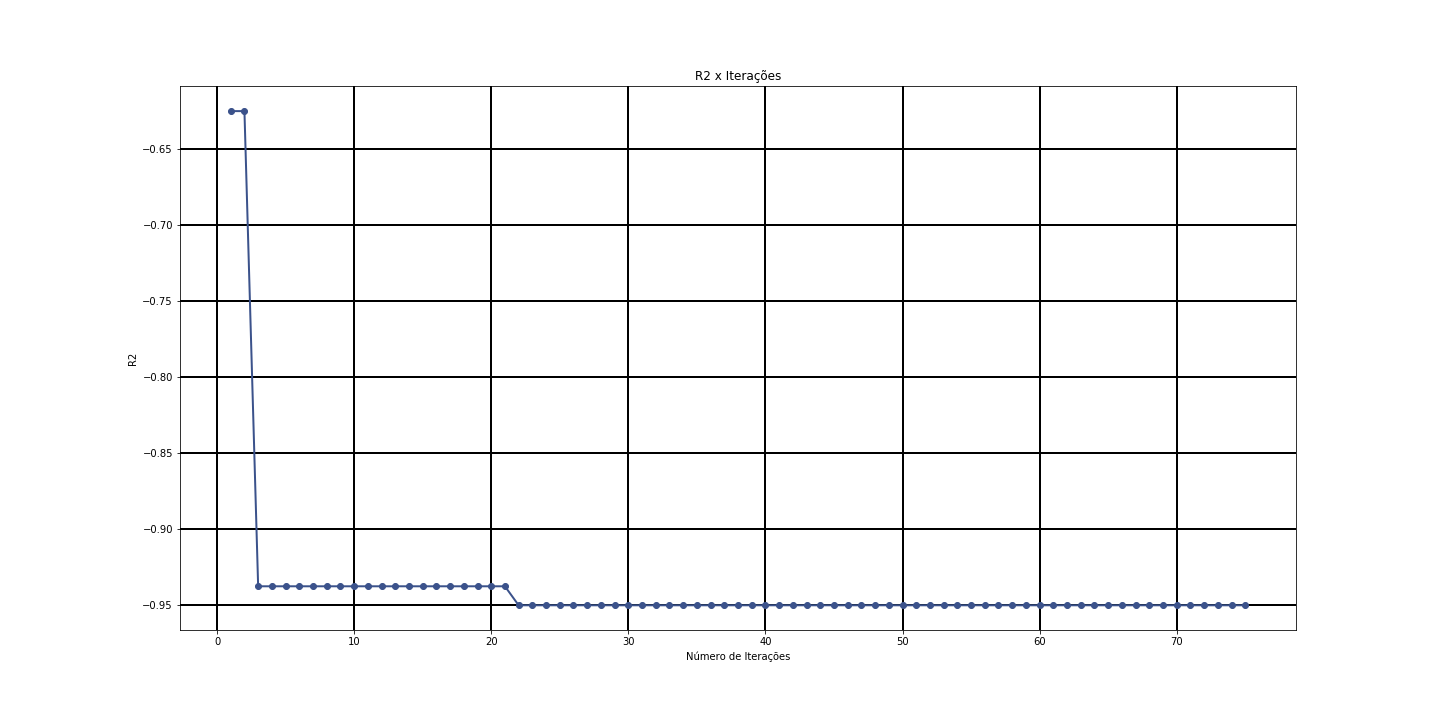

In [9]:
def minimizar_mlp(params, r = results):
    alpha = params[0]
    solver = params[1]
    power_t = params[2]
    beta_1 = params[3]
    beta_2 = params[4]
    n_iter_no_change = params[5]
    activation = params[6]
    
    #print(params)
    
    modelo = MLPClassifier(random_state = 7,
                           alpha = alpha,
                           solver = solver,
                           power_t = power_t,
                           beta_1 = beta_1,
                           beta_2 = beta_2,
                           n_iter_no_change = n_iter_no_change,
                           activation = activation)
    
    R = r[(r["Acurácia Média"] + r["Precisão Média"]) == (r["Acurácia Média"] + r["Precisão Média"]).max()].values[0]
    
    escala = {"Original": None,
              "MinMaxScaler": preprocessing.MinMaxScaler(feature_range = (0, 1)),
              "StandardScaler": preprocessing.StandardScaler(),
              "RobustScaler": preprocessing.RobustScaler(),
              "MaxAbsScaler": preprocessing.MaxAbsScaler(),
              "QuantileTransformer": preprocessing.QuantileTransformer(),
              "Normalizer": preprocessing.Normalizer()}
    
    metricas = {"acc": "accuracy"}
    
    resultados = cross_validate(make_pipeline(escala[R[1]], modelo), X, Y, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7), scoring = metricas)
    
    return - sum(resultados["test_acc"]) / 5


espaco = [(0.0001, 100.1),
          ("lbfgs", "sgd", "adam"),
          (0.5, 50.0),
          (0.009, 0.9),
          (0.05, 0.999),
          (10, 100),
          ("identity", "logistic", "tanh", "relu")]

#resultados_otimizacao = gp_minimize(minimizar_mlp, espaco, random_state = 1, n_calls = 75, n_random_starts = 10, verbose = False)

def iteracoes():
    figure(figsize=(20,10))
    resultados_otimizacao.func_vals[0] = resultados_otimizacao.func_vals[1]
    plot_convergence(resultados_otimizacao)
    plt.title("R2 x Iterações")
    plt.xlabel("Número de Iterações")
    plt.ylabel("R2")
    plt.grid(color = 'black', linestyle = '-', linewidth = 2)
    plt.savefig('imagem_mlp.png')
    plt.show()

#iteracoes()
    
display(Image(filename='imagem_mlp.png')) 

# Previsões

## Dados de Validação

________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:
________________________________________________________________ACURÁCIA:  0.9538461538461539
________________________________________________________________RECALL:  1.0
________________________________________________________________PRECISÃO:  0.5714285714285714
________________________________________________________________F1:  0.7272727272727273
________________________________________________________________SELETIVIDADE:  0.9508196721311475
________________________________________________________________NPV:  1.0


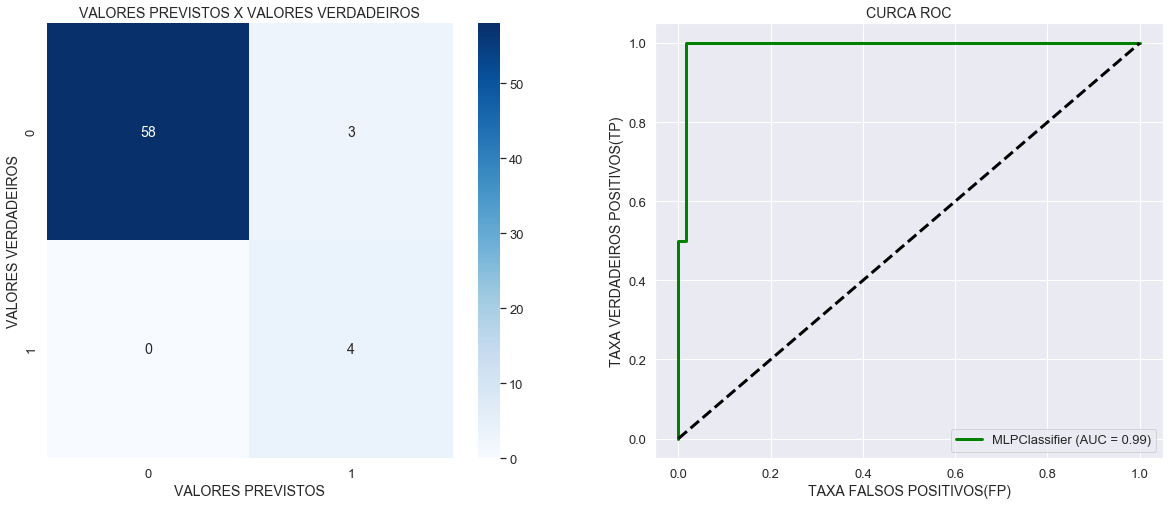

In [10]:
def modelos(modelo, Xtreino, Ytreino, Xteste, Yteste):
    sns.set(font_scale = 1.175)
    modelo.fit(Xtreino, Ytreino)
    
    valores_previstos = modelo.predict(Xteste)
        
    matriz = confusion_matrix(Yteste, valores_previstos)
    tn, fp, fn, tp = matriz.ravel()
    
    metricas = [accuracy_score(Yteste, valores_previstos),
                recall_score(Yteste, valores_previstos),
                precision_score(Yteste, valores_previstos),
                f1_score(Yteste, valores_previstos),
                tn / (tn + fp),
                tn / (tn + fn)]
    
    print("________________________________________________________________ACURÁCIA: ", metricas[0])
    print("________________________________________________________________RECALL: ", metricas[1])
    print("________________________________________________________________PRECISÃO: ", metricas[2])
    print("________________________________________________________________F1: ", metricas[3])
    print("________________________________________________________________SELETIVIDADE: ", metricas[4])
    print("________________________________________________________________NPV: ", metricas[5])
    
    fig, ax = plt.subplots(figsize = (20, 8), nrows = 1, ncols = 2)
    sns.heatmap(matriz, annot = True, cmap = "Blues", fmt = 'g', ax = ax[0])
    ax[0].set_title("VALORES PREVISTOS X VALORES VERDADEIROS")
    ax[0].set_xlabel("VALORES PREVISTOS")
    ax[0].set_ylabel("VALORES VERDADEIROS")
    
    metrics.plot_roc_curve(modelo, Xteste, Yteste, ax = ax[1], lw = 3, color = "green")
    a = sns.lineplot(x = [0,1], y = [0,1], color = "black", lw = 3, ax = ax[1])
    a.lines[1].set_linestyle("--")
    ax[1].set_title("CURCA ROC")
    ax[1].set_xlabel("TAXA FALSOS POSITIVOS(FP)")
    ax[1].set_ylabel("TAXA VERDADEIROS POSITIVOS(TP)")
    
    plt.show()

arquivo = "modelo_diabetes_catc.sav"
'''
pickle.dump(CatBoostClassifier(random_state = 7,
                                verbose = False,
                                learning_rate = resultados_otimizacao.x[0],
                                l2_leaf_reg = resultados_otimizacao.x[1],
                                depth = resultados_otimizacao.x[2],
                                iterations = resultados_otimizacao.x[3],
                                od_type = resultados_otimizacao.x[4],
                                random_strength = resultados_otimizacao.x[5],
                                od_wait = resultados_otimizacao.x[6],
                                boosting_type = "Plain",
                                bootstrap_type = "Bernoulli"), open(arquivo, 'wb'))
'''
modelo_otimizado0 = pickle.load(open(arquivo, 'rb'))

print("________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:")
modelos(MLPClassifier(random_state = 7), X, Y, X_val0, Y_val)

## Todos de Treino

________________________________________________________________ACURÁCIA:  0.875
________________________________________________________________RECALL:  0.775
________________________________________________________________PRECISÃO:  0.96875
________________________________________________________________F1:  0.8611111111111113
________________________________________________________________SELETIVIDADE:  0.975
________________________________________________________________NPV:  0.8125


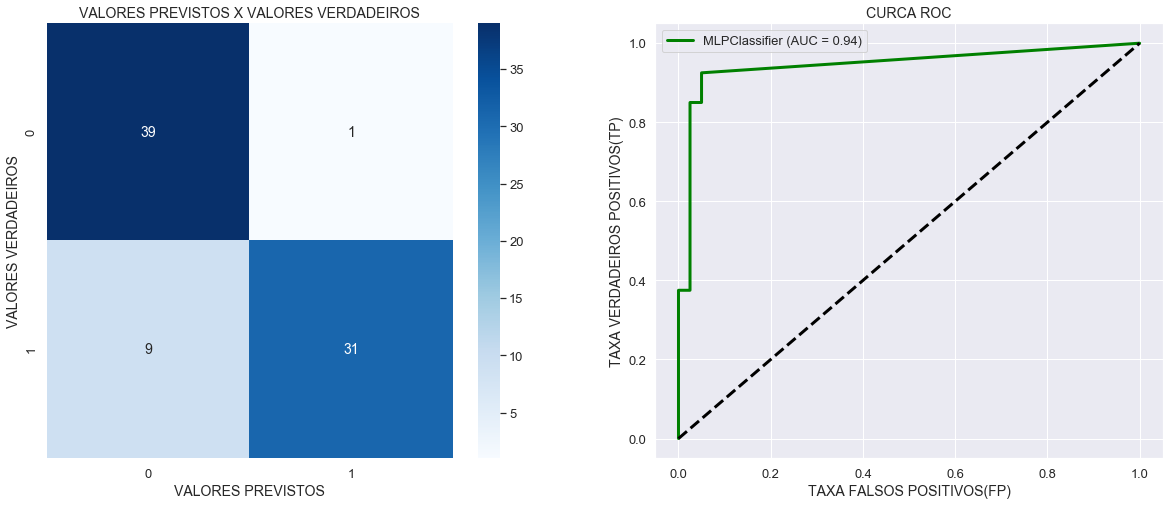

In [11]:
modelos(MLPClassifier(random_state = 7), X, Y, X, Y)

## Todos os Dados

________________________________________________________________ACURÁCIA:  0.9230769230769231
________________________________________________________________RECALL:  0.7954545454545454
________________________________________________________________PRECISÃO:  0.4605263157894737
________________________________________________________________F1:  0.5833333333333334
________________________________________________________________SELETIVIDADE:  0.9323432343234324
________________________________________________________________NPV:  0.9843205574912892


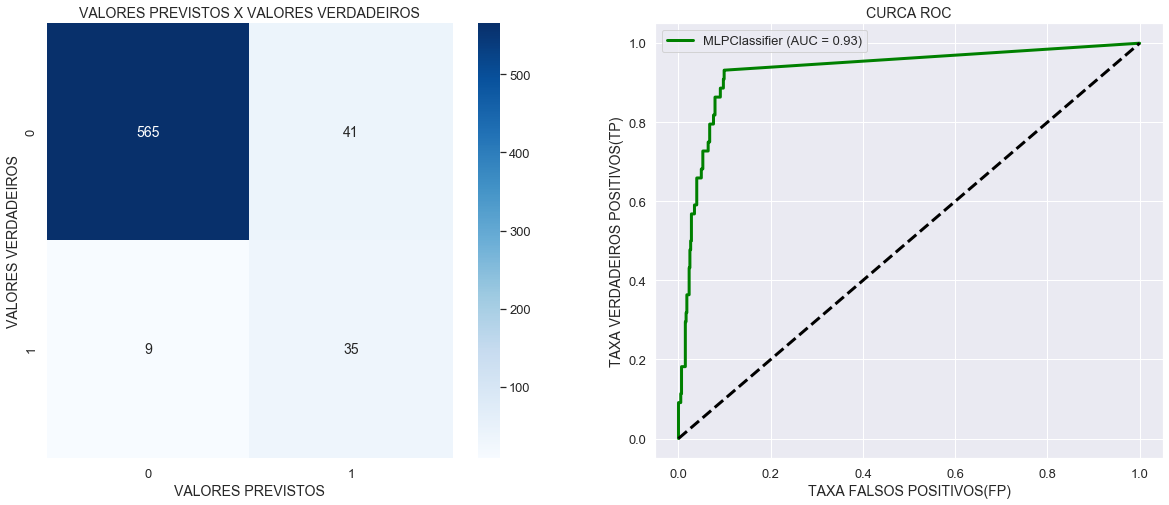

In [12]:
x0, y = previsao(r = results, g1 = novos_dados.loc[:,novos_dados.columns != "Biopsy"], g2 = novos_dados.Biopsy)
x0 = x0.values
y = y.values

modelos(MLPClassifier(random_state = 7), X, Y, x0, y)